# O que foi feito:

Forward pass

Backward pass

Otimizadores:

  -Momentum

  -Adam

Decaimento da taxa de aprendizado

Mini-batch

OBS: esses códigos são só exemplos visuais, os que rodaram estão todos no github (incluindo o código dos gráficos)

# 1

In [ ]:
def __init__(...):
    ...
    self.optimizer = optimizer.lower()
    self.beta1 = beta1
    self.beta2 = beta2
    self.epsilon = epsilon
    self.momentum = momentum
    self.decay_rate = decay_rate
    ...

optimizer: permite selecionar qual algoritmo de otimização usar (sgd, momentum ou adam).

beta1, beta2: parâmetros específicos do Adam, usados para momentos de primeira e segunda ordem.

epsilon: evita divisão por zero ao normalizar os momentos (Adam).

momentum: controla a influência da iteração anterior na atualização atual.

decay_rate: permite a redução da taxa de aprendizado ao longo do tempo.

# 2. Inicialização dos parâmetros do otimizador

In [ ]:
def _initialize_optimizer_states(self):
    self.v_w_ih = np.zeros_like(self.weights_input_hidden)
    self.v_w_ho = np.zeros_like(self.weights_hidden_output)
    ...

v_: representam os vetores de velocidades (momentum).

m_ e vv_: momentos de primeira e segunda ordem para o algoritmo Adam.

Isso é importante porque o Adam precisa lembrar de estados anteriores para ajustar o passo de atualização.

# 3. Decaimento da taxa de aprendizado

In [ ]:
def learning_rate_decay(self):
    if self.decay_rate > 0:
        self.learning_rate = self.learning_rate / (1.0 + self.decay_rate * np.log1p(self.t))

A cada iteração, t aumenta, e a learning_rate é reduzida de forma logarítmica.

Isso ajuda o modelo a aprender rápido no início e depois refinar os pesos com passos menores.

# 4. Forward pass

In [ ]:
def forward(self, X):
    self.hidden_input = np.dot(X, self.weights_input_hidden)
     if self.use_bias:
            self.hidden_input += self.bias_hidden
      self.hidden_output = self.activation_func(self.hidden_input)
    ...

Calcula a saída da camada oculta e da camada de saída.

Usa a função de ativação (como ReLU ou Sigmoid) para não linearidade.

# 5. Backward pass

### a) Cálculo dos gradientes:

In [ ]:
delta_weights_hidden_output = np.dot(self.hidden_output.T, output_error)
delta_weights_input_hidden = np.dot(X.T, hidden_error)

Esses deltas são os valores usados para atualizar os pesos.

### b) Atualização segundo otimizador:
➤ SGD (Stochastic Gradient Descent)

In [ ]:
self.weights_hidden_output -= self.learning_rate * dw_ho
...

Atualiza pesos diretamente com o gradiente.

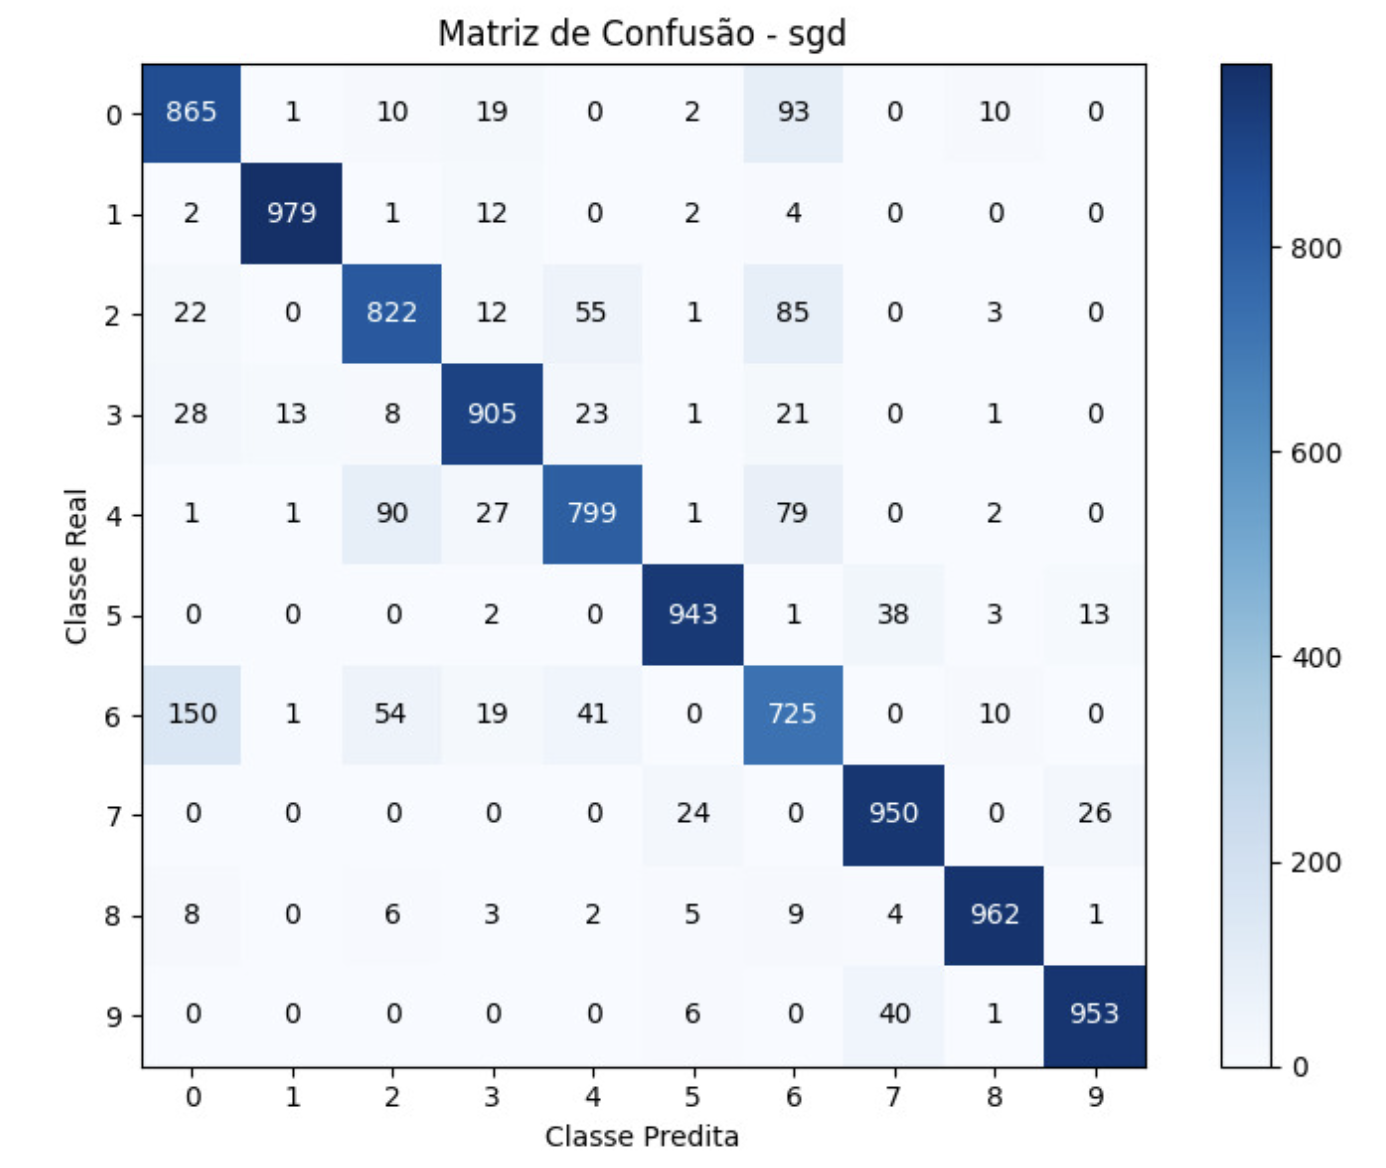

Quando o otimizador SGD é utilizado, a função de perda (loss) tende a apresentar uma redução mais lenta e com mais flutuações.

### ➤ Momentum

In [ ]:
self.v_w_ho = self.momentum * self.v_w_ho + dw_ho
...

Acumula a direção do gradiente ao longo do tempo, suavizando as atualizações.

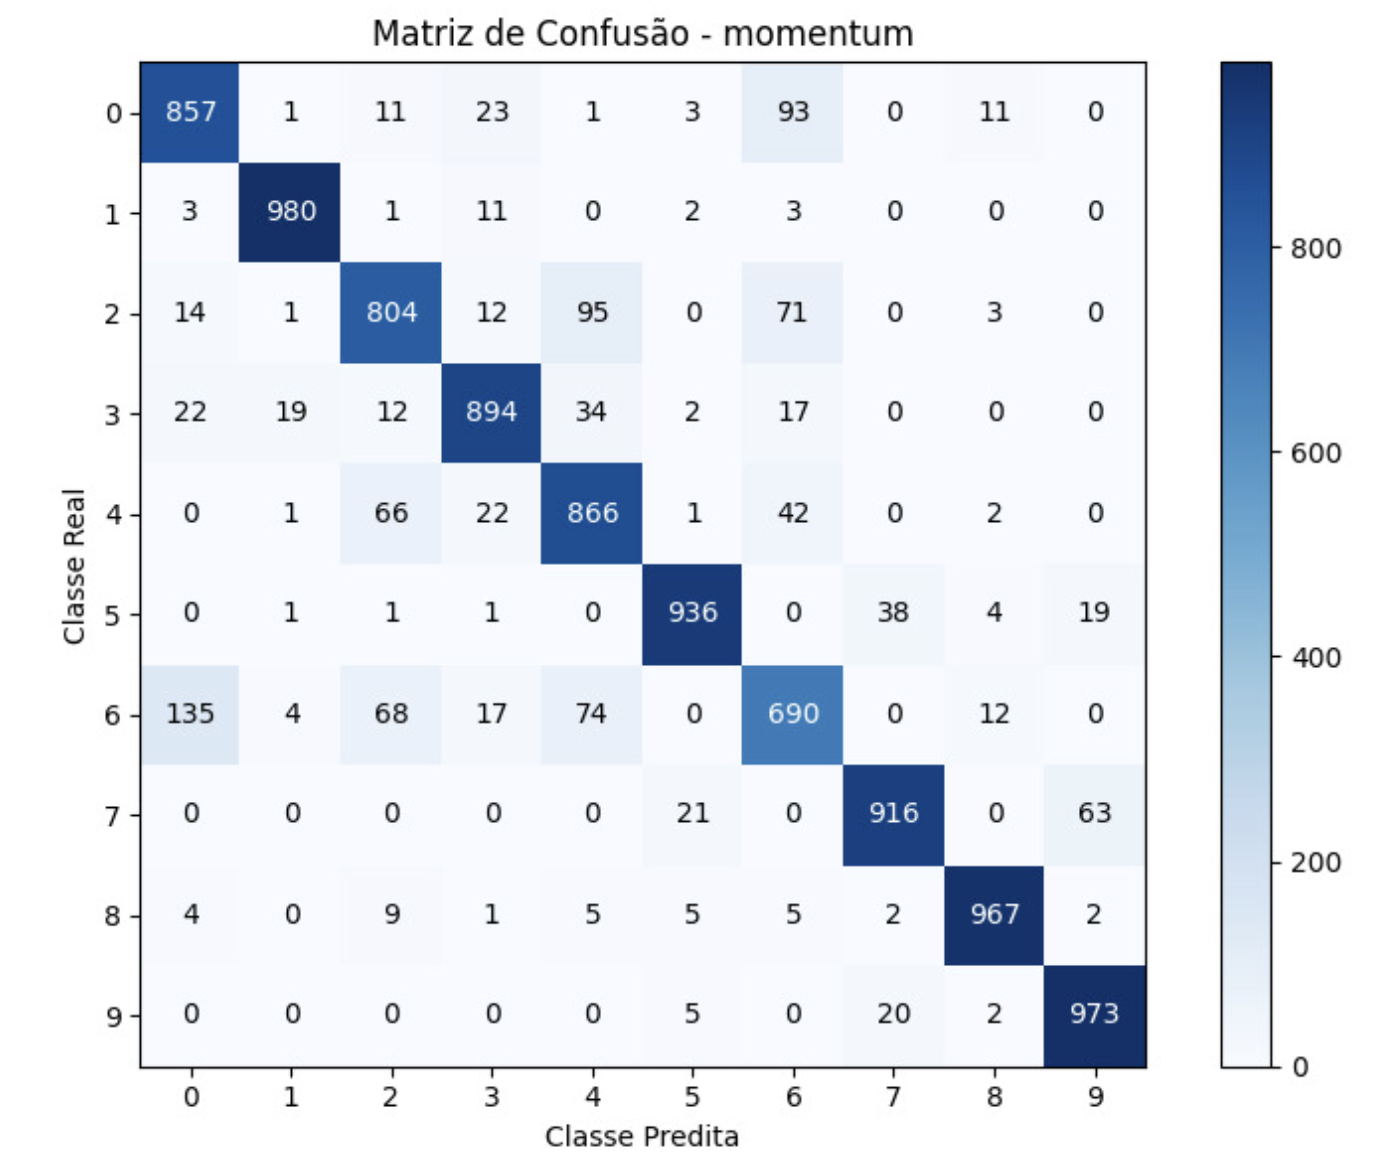

Quando o otimizador Momentum é utilizado, a função de perda (loss) geralmente apresenta uma redução suave e contínua, com menos flutuações.






### Adam

In [ ]:
self.m_w_ho = self.beta1 * self.m_w_ho + (1 - self.beta1) * dw_ho
self.vv_w_ho = self.beta2 * self.vv_w_ho + (1 - self.beta2) * (dw_ho ** 2)
...

Usa momentos exponenciais do gradiente (média e variância) e os corrige com base no tempo.

O nome "Adam" vem de "Adaptive Moment Estimation".

d) Atualização dos bias:
Bias também são atualizados conforme o otimizador escolhido.

Preservar os valores anteriores (prev_delta_bias_output) para casos como Momentum.



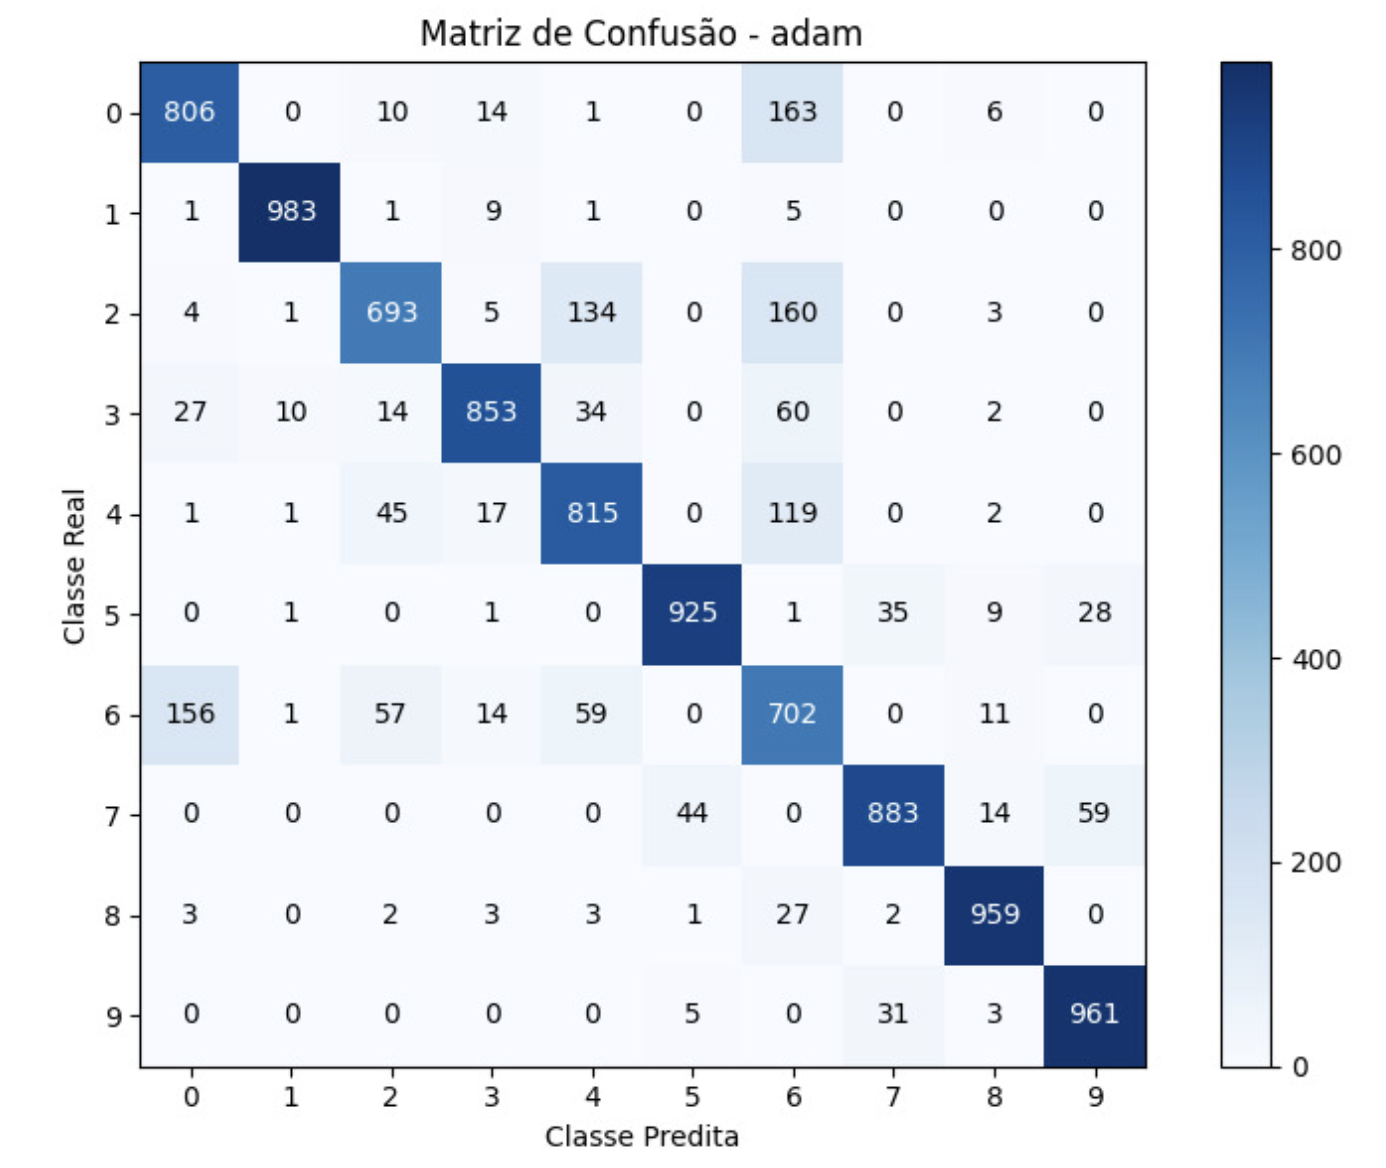

Quando o otimizador Adam é utilizado, a função de perda (loss) geralmente apresenta uma redução estável e mais rápida durante o treinamento, refletindo um bom ajuste do modelo.

# 6. Função auxiliar

### a) Função de perda:

In [ ]:
def _cross_entropy_loss(self, probs, y_true):
    epsilon = 1e-15
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    ...

Evita log(0), o que causaria NaN na perda.

Usa cross-entropy, comum em classificação.



# Mais resultados:

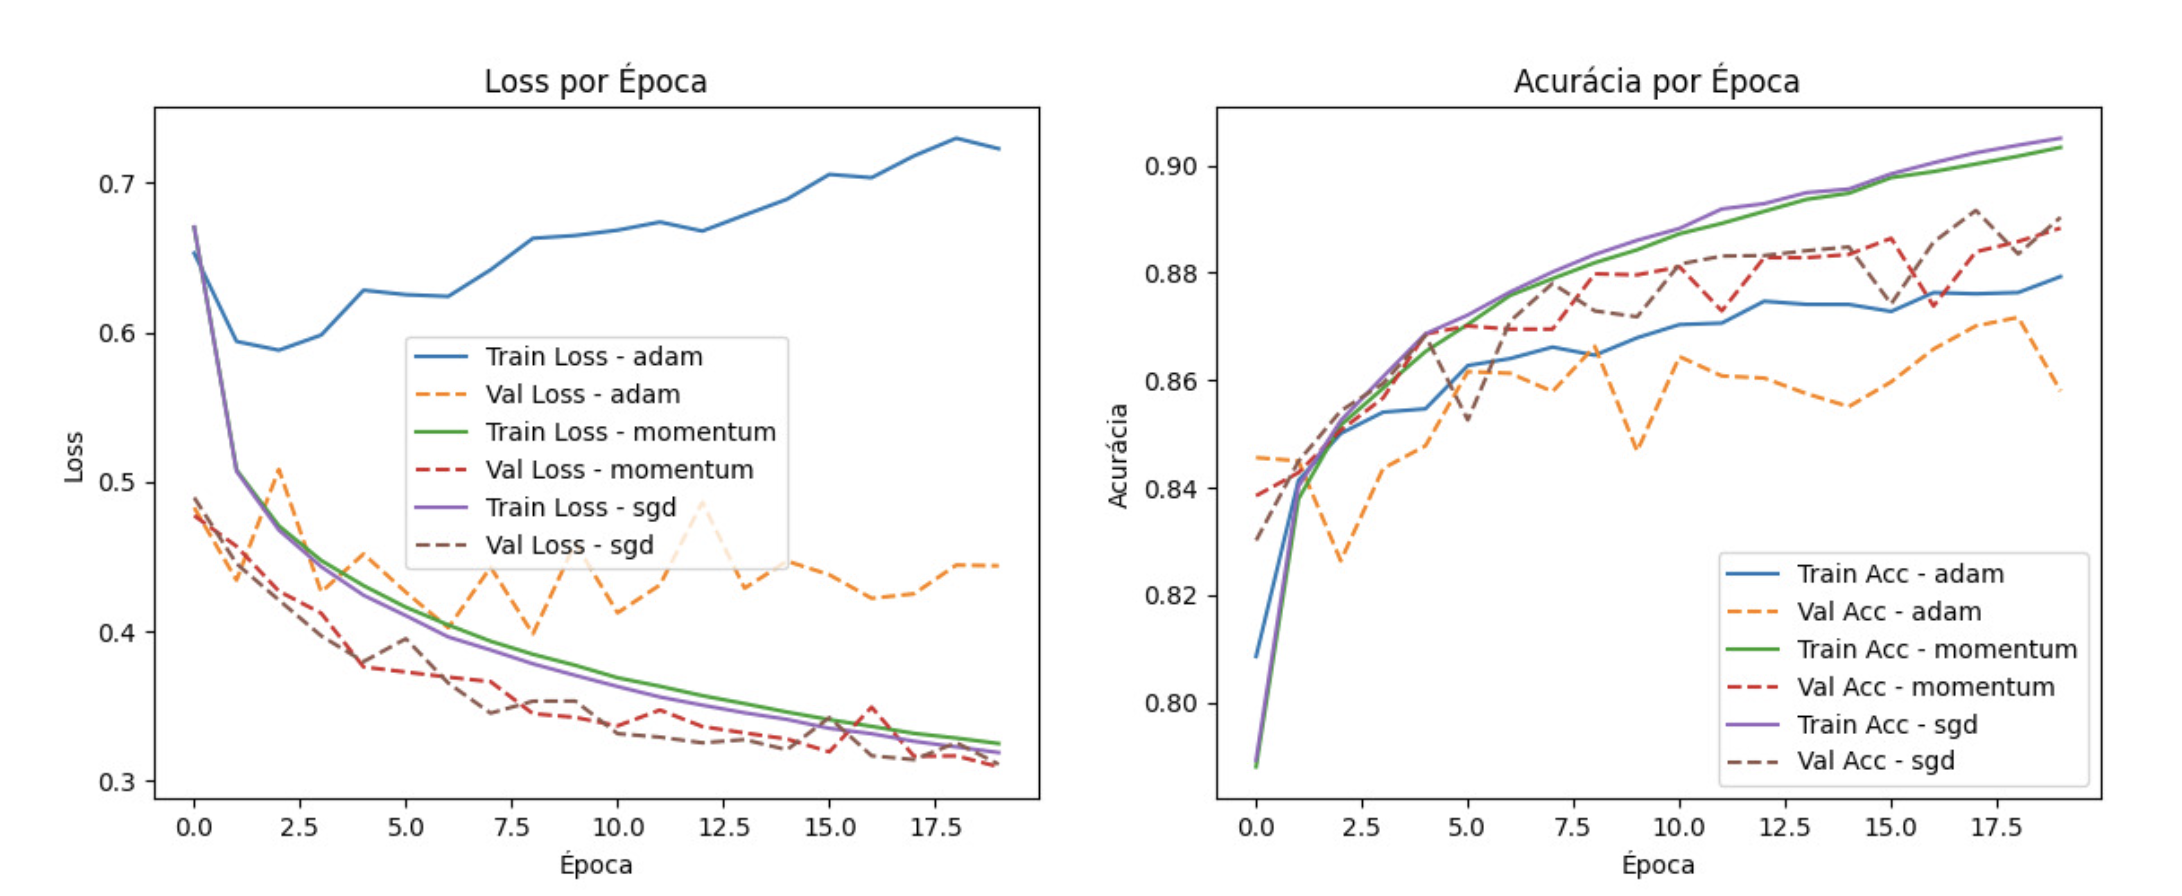

Vemos a evolução da loss (esquerda) e da acurácia (direita) ao longo das épocas para diferentes otimizadores: Adam, Momentum e SGD.

Loss: O otimizador Adam apresenta a menor perda tanto para treino quanto para validação, com uma queda consistente e estável. Momentum e SGD mostram perdas mais altas, com o SGD tendo mais flutuações.

Acurácia: Adam tem o melhor desempenho em termos de acurácia, seguido de Momentum, enquanto SGD tem um desempenho ligeiramente inferior, especialmente no caso de validação. A acurácia de validação de SGD mostra mais variação.

Ou seja, o Adam oferece o melhor equilíbrio entre perda baixa e alta acurácia, enquanto Momentum e SGD têm desempenho inferior, com o SGD sendo mais instável.